# IMPORTACIONES

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
df_dia = pd.read_csv("./datasets/productos_dia.csv")
df_precios = pd.read_csv("./datasets/precios_productos.csv", index_col = 0, decimal=",", thousands=".")

# EDA

In [79]:
df_dia.columns

Index(['Unnamed: 0', 'url', 'supermarket', 'name', 'description',
       'product_id'],
      dtype='object')

In [80]:
eliminar = ["Unnamed: 0", "description"]
df_dia.drop(eliminar, axis = 1, inplace = True)

df_dia.columns

Index(['url', 'supermarket', 'name', 'product_id'], dtype='object')

In [81]:
df_dia["product_id"].value_counts()

product_id
cd3f6bc51b2d934c1e46b0136ed62779    8
5d2d1ed4575049c5cf5bea27ea6bad2c    7
2f268ae7ec6b26d49f1f463c4dd49244    6
b9c8b94b603a4b69e4454717730eab8c    5
cd8ce5872c384f6b95e09a887b5a2759    5
                                   ..
07404706d9a1ce1b420d5b634d698973    1
a64a3cd9d5b1ce52063a794f92ed570c    1
0fe0600ea0d79bf41ba5d2c296d7ba9b    1
2c9d279e50656af45f37c46857f75f31    1
01af8bbca86863c1c85df068d136ac11    1
Name: count, Length: 9496, dtype: int64

In [82]:
df_dia.drop_duplicates(subset=["product_id"], keep = "first", inplace = True)

In [83]:
df_dia[df_dia.duplicated(subset = ["product_id"], keep = False)].sort_values("product_id")

,url,supermarket,name,product_id


In [84]:
# Identificar categoría y subcategoría

df_dia[["categoria","subcategoria","otros"]] = df_dia["url"].str.split("/", expand= True).get([4,5,6])
df_dia.head(3)

,url,supermarket,name,product_id,categoria,subcategoria,otros
0,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,9e2fda45e63337294f2a604178823026,cuidado-del-hogar,lavavajillas,p
1,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA lavavajillas máquina premium todo en uno e...,244994c762813d38881cb118742152a2,cuidado-del-hogar,lavavajillas,p
2,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,FAIRY lavavajillas máquina platinum azul en cá...,8a5398b602e44b93a0c0a4a7b9d22b84,cuidado-del-hogar,lavavajillas,p


In [85]:
condicion = df_dia['categoria'] == 'clasificacion-de-categorias'
df_dia.loc[condicion, "categoria"] = df_dia.loc[condicion, "subcategoria"]
df_dia.loc[condicion, "subcategoria"] = df_dia.loc[condicion, "otros"]

# Unión

In [86]:
merge_inner = df_dia.merge(df_precios, left_on = 'product_id', right_on = 'product_id')
merge_inner.head(2)

,url,supermarket,name,product_id,categoria,subcategoria,otros,price,reference_price,reference_unit,insert_date
0,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,9e2fda45e63337294f2a604178823026,cuidado-del-hogar,lavavajillas,p,1.59,1.59,ud,2021-08-14 00:00:00
1,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,9e2fda45e63337294f2a604178823026,cuidado-del-hogar,lavavajillas,p,1.59,1.59,ud,2021-08-17 00:00:00


In [87]:
print(df_dia.shape)
print(df_precios.shape)
print(merge_inner.shape)

(9496, 7)
(1000000, 5)
(1000000, 11)


# Repaso II: Productos_dia y Precio_productos

Imagina que eres un analista de datos para el supermercado Día, y te proporcionan los datos de los productos y sus precios.

Para ello podemos hacer una análisis de los datos para obtener información relevante, sobre:

1. Identificar la categoría y subcategoría de cada producto

In [88]:
df_dia['categoria'].unique()

array(['cuidado-del-hogar', 'cuidado-del-hogar-de-limpieza', 'mascotas',
       'platos-preparados', 'al-dia', 'despensa', 'bebidas', 'bodega',
       'bebe', 'congelados', 'cuidado-personal', 'frescos',
       'dulces-de-navidad'], dtype=object)

In [89]:
df_dia['subcategoria'].unique()

array(['lavavajillas', 'bano', 'perros', 'hogar', 'ambientadores',
       'calzado', 'insecticidas', 'gatos', 'nuestra-cocina-al-dia',
       'gazpachos-y-salmorejos', 'charcuteria-y-quesos',
       'desayunos-y-dulces', 'conservas', 'pastas-harinas-y-masas',
       'aceites-vinagres-y-alinos', 'cocina-internacional',
       'bebidas-isotonicas-y-energeticas', 'espumosos', 'panales',
       'utensilios-de-limpieza', 'dieteticos', 'helados', 'afeitado',
       'botiquin', 'depilacion', 'bano-e-higiene-personal',
       'cuidado-bucal', 'cuidado-corporal', 'toallitas', 'cuidado-intimo',
       'cuidado-del-bebe', 'sopas', 'pan', 'sal-y-especias',
       'cuidado-de-la-ropa', 'pescado-y-marisco', 'cocina', 'aguas',
       'refrescos', 'cervezas', 'zumos', 'batidos-y-horchata', 'vino',
       'vinos-de-mesa-sangrias-y-tintos-de-verano', 'alcoholes', 'frutas',
       'aperitivos', 'pescado', 'verduras', 'bocadillos-y-sandwich',
       'carne', 'croquetas-y-aperitivos', 'verduras-y-hortaliza

In [90]:
df_filtrado = df_dia[df_dia["categoria"].isin(["clasificacion-de-categorias"])]
df_filtrado

,url,supermarket,name,product_id,categoria,subcategoria,otros


In [91]:
df_dia.shape

(9496, 7)

2. ¿Qué categoría es la que vende más productos?

In [92]:
# 2. ¿Qué categoría es la que vende más productos?
df_ventas = df_dia.groupby("categoria")["name"].count().reset_index()
df_ventas

,categoria,name
0,al-dia,733
1,bebe,282
2,bebidas,579
3,bodega,388
4,congelados,406
5,cuidado-del-hogar,784
6,cuidado-del-hogar-de-limpieza,190
7,cuidado-personal,2343
8,despensa,3147
9,dulces-de-navidad,103


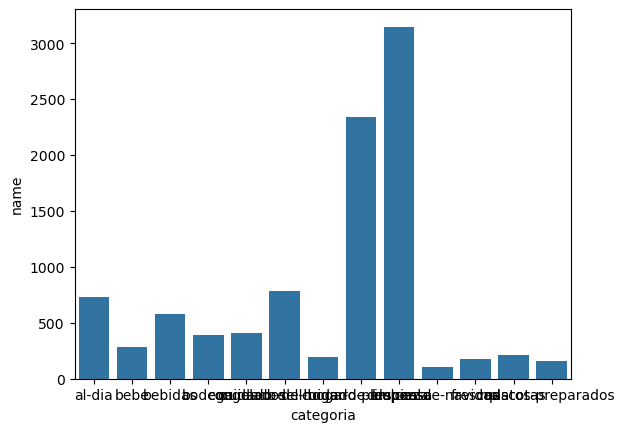

In [93]:
sns.barplot(data = df_ventas, x="categoria", y="name")
plt.show()

In [94]:
#cómo sacar df del máximo con el nombre ce la cateoría como arriba?????
df_ventas = df_dia.groupby("categoria")["name"].count().max()
df_ventas

3147

In [95]:
df_dia["categoria"].info()

<class 'pandas.core.series.Series'>
Index: 9496 entries, 0 to 11492
Series name: categoria
Non-Null Count  Dtype 
--------------  ----- 
9496 non-null   object
dtypes: object(1)
memory usage: 148.4+ KB


3. Dentro de cada categoría, ¿qué subcategorías son más populares?

In [96]:
df_cat_subcat = df_dia.groupby(['categoria','subcategoria'])['name'].count().reset_index()
df_cat_subcat = df_cat_subcat.sort_values(by=["categoria", "name"], ascending=[True, False])
df_cat_subcat

,categoria,subcategoria,name
1,al-dia,charcuteria-y-quesos,393
0,al-dia,carne,110
4,al-dia,verduras-y-hortalizas,99
2,al-dia,frutas,84
3,al-dia,pescado-y-marisco,47
...,...,...,...
87,platos-preparados,nuestra-cocina-al-dia,10
86,platos-preparados,legumbres,6
91,platos-preparados,tortillas,6
83,platos-preparados,empanadas-empanadillas-y-hojaldres,5


In [97]:
top3_por_categoria = df_cat_subcat.groupby('categoria').head(3)
top3_por_categoria

,categoria,subcategoria,name
1,al-dia,charcuteria-y-quesos,393
0,al-dia,carne,110
4,al-dia,verduras-y-hortalizas,99
6,bebe,cuidado-del-bebe,117
10,bebe,potitos-y-tarritos,63
8,bebe,panales,46
16,bebidas,refrescos,158
15,bebidas,cervezas,152
17,bebidas,zumos,142
21,bodega,vino,184


4. ¿Qué categoría es la que tiene los precios más altos? ¿y los mínimos? ¿Cuál es su media?

In [98]:
df_precios.columns

Index(['price', 'reference_price', 'product_id', 'reference_unit',
       'insert_date'],
      dtype='object')

In [99]:
df_dia.columns

Index(['url', 'supermarket', 'name', 'product_id', 'categoria', 'subcategoria',
       'otros'],
      dtype='object')

In [100]:
merge_inner.columns

Index(['url', 'supermarket', 'name', 'product_id', 'categoria', 'subcategoria',
       'otros', 'price', 'reference_price', 'reference_unit', 'insert_date'],
      dtype='object')

In [101]:
media = merge_inner.groupby(['categoria'])['price'].mean().reset_index().sort_values(by="price", ascending=False).round(2)
media.head(1)

,categoria,price
10,frescos,8.11


In [102]:
maximo = merge_inner.groupby(['categoria'])['price'].max().reset_index().sort_values(by="price", ascending=False).round(2)
maximo.head(1)

,categoria,price
10,frescos,289.0


In [103]:
minimo = merge_inner.groupby(['categoria'])['price'].min().reset_index().sort_values(by="price", ascending=True).round(2)
minimo.head(1)

,categoria,price
9,dulces-de-navidad,0.08


## Análisis de precios y productos
1. ¿Existen productos con precios fuera de lo común (outliers)?

In [106]:
q1= merge_inner["price"].quantile(0.25)
q3 = merge_inner["price"].quantile(0.75)
iqr = q3-q1

In [109]:
outliers = merge_inner[(merge_inner["price"] < q1 - 1.5 * iqr) | (merge_inner["price"] > q3 + 1.5 * iqr)]
outliers

,url,supermarket,name,product_id,categoria,subcategoria,otros,price,reference_price,reference_unit,insert_date
42,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,FAIRY lavavajillas máquina platinum azul en cá...,8a5398b602e44b93a0c0a4a7b9d22b84,cuidado-del-hogar,lavavajillas,p,9.99,0.24,ud,2021-10-23 00:00:00
43,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,FAIRY lavavajillas máquina platinum azul en cá...,8a5398b602e44b93a0c0a4a7b9d22b84,cuidado-del-hogar,lavavajillas,p,9.99,0.24,ud,2022-03-23 00:00:00
44,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,FAIRY lavavajillas máquina platinum azul en cá...,8a5398b602e44b93a0c0a4a7b9d22b84,cuidado-del-hogar,lavavajillas,p,9.99,0.24,ud,2022-03-14 00:00:00
45,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,FAIRY lavavajillas máquina platinum azul en cá...,8a5398b602e44b93a0c0a4a7b9d22b84,cuidado-del-hogar,lavavajillas,p,9.99,0.24,ud,2022-03-17 00:00:00
46,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,FAIRY lavavajillas máquina platinum azul en cá...,8a5398b602e44b93a0c0a4a7b9d22b84,cuidado-del-hogar,lavavajillas,p,9.99,0.24,ud,2022-06-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
999784,https://www.dia.es/compra-online/cuidado-perso...,dia-es,DUREX preservativos sensitivo XL caja 10 uds,0fec2ce948aa0f6a59577a4bb0def8e1,cuidado-personal,salud-sexual,p,11.99,1.20,ud,2022-07-29 00:00:00
999785,https://www.dia.es/compra-online/cuidado-perso...,dia-es,DUREX preservativos sensitivo XL caja 10 uds,0fec2ce948aa0f6a59577a4bb0def8e1,cuidado-personal,salud-sexual,p,11.99,1.20,ud,2022-08-03 00:00:00
999786,https://www.dia.es/compra-online/cuidado-perso...,dia-es,DUREX preservativos sensitivo XL caja 10 uds,0fec2ce948aa0f6a59577a4bb0def8e1,cuidado-personal,salud-sexual,p,11.99,1.20,ud,2022-08-04 00:00:00
999787,https://www.dia.es/compra-online/cuidado-perso...,dia-es,DUREX preservativos sensitivo XL caja 10 uds,0fec2ce948aa0f6a59577a4bb0def8e1,cuidado-personal,salud-sexual,p,11.99,1.20,ud,2022-08-08 00:00:00


2. ¿Cuántos productos tienen un precio superior al precio de referencia?

3. ¿Qué categorías de productos tienen la mayor y menor variación de precios?

4. ¿Cómo varían los precios de los productos a lo largo del tiempo?

## Análisis de productos
1. ¿Qué productos tienen más registros de precios?

2. ¿Cuántos productos distintos hay en el dataset?

3. ¿Existen productos en el dataset de precios que no tienen información en el dataset de productos?

## Relación entre precios y unidades de medida
1. ¿Cuál es el precio medio por unidad de referencia de cada producto?

Recuerda que para realizar este análisis, deberás unir los dos conjuntos de datos de la forma más eficiente. Y realizar un exploración y limpieza de los datos

In [104]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

# Los datos
Para este repaso usaremos dos conjuntos de datos, estos son:

productos_dia.csv: en el que podremos encontrar una serie de productos, y sus precios. Las columnas que hay son:

- url: Es el enlace URL asociado al producto en el sitio web de un supermercado específico. Por ejemplo, el primer registro tiene una URL que probablemente lleva a la página del producto en el sitio web de DIA.

- supermarket: Es el nombre o identificador del supermercado. Por ejemplo, "dia-es" puede referirse al supermercado DIA.

- name: Es el nombre del producto. Por ejemplo, el primer registro describe un producto llamado "MISTOL lavavajillas mano original botella 900 ml".

- description: Proporciona una descripción detallada del producto. Por ejemplo, el segundo registro describe un producto llamado "DIA lavavajillas máquina premium todo en uno e...".

- product_id: Es un identificador único para cada producto. Sin embargo, en estos casos específicos, parece haber valores faltantes (NaN) en esta columna. Cada valor único en esta columna representa un producto diferente.

precios_productos.csv: en el que encontramos todos los productos que han comprando y vendido en el supermercado desde el 2021. Las columnas que tenemos son:

- price: Este es el precio del producto en la moneda especificada. Por ejemplo, el primer registro tiene un precio de 0,7 en alguna moneda no especificada.

- reference_price: Se refiere al precio de referencia del producto. Podría ser el precio original, el precio de venta sugerido u otro precio relevante asociado al producto. Por ejemplo, el segundo registro tiene un precio de referencia de 10,63.

- product_id: Es un identificador único para cada producto. Cada valor único en esta columna representa un producto diferente. Por ejemplo, "9b1d806ddaed2a3b4c842c361e9171a8" es el ID de un producto.

- reference_unit: Indica la unidad de medida utilizada para el precio de referencia del producto. Por ejemplo, "ud" podría representar unidades (cada unidad), "kg" kilogramos, o "l" litros.

- insert_date: Es la fecha en la que se insertó este registro en el DataFrame. Por ejemplo, el primer registro fue insertado el 8 de junio de 2022 a las 00:00:00.